In [31]:
!pip install seaborn

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
df=pd.read_csv(r'C:\Users\Sparsh\Desktop\Data Science\Uber Ride Analysis\uber_data.csv')

In [69]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [70]:
d1='4/1/2014 0:11:00'

In [71]:
pd.to_datetime(d1)

Timestamp('2014-04-01 00:11:00')

In [72]:
d2=pd.to_datetime(d1)
d2.week


14

In [73]:
d2.day

1

In [74]:
d2.month

4

In [75]:
d2.weekday()

1

d2.weekday_name    = not working

In [131]:
df['Date/Time']=df['Date/Time'].map(pd.to_datetime)

In [77]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [78]:
def get_dom(dt):
    return dt.day


df['DOM']=df['Date/Time'].map(get_dom)

In [79]:
df.head()

,Date/Time,Lat,Lon,Base,DOM
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [80]:
def get_weekday(dt):
    return dt.weekday()

df['weekday']=df['Date/Time'].map(get_weekday)



def get_hour(dt):
    return dt.hour

df['hour']=df['Date/Time'].map(get_hour)




In [81]:
df.tail(4)

,Date/Time,Lat,Lon,Base,DOM,weekday,hour
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


### Rides on respective dates

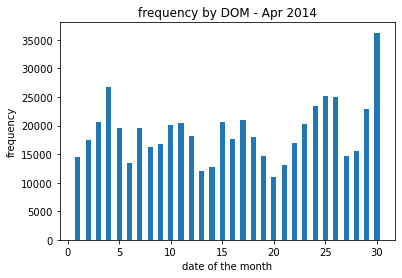

In [82]:
plt.hist(df['DOM'],bins=30,rwidth=0.5, range=(0.5,30.5))
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('frequency by DOM - Apr 2014')
plt.rcParams['figure.figsize'] = [10, 5]

In [83]:
for k ,rows in df.groupby('DOM'):
    print(k,len(rows))
      
    


1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [84]:
def count_rows(rows):
    return len(rows)


by_date=df.groupby('DOM').apply(count_rows)
by_date

DOM
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

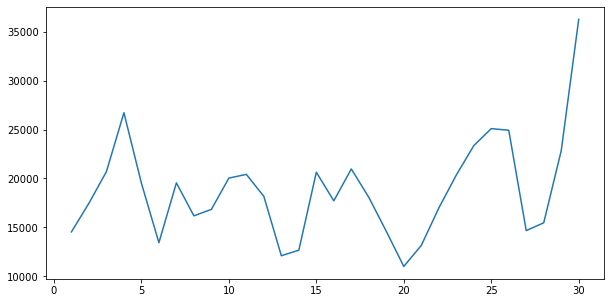

In [85]:
 plt.plot(by_date)

In [86]:
by_date_sorted=by_date.sort_values()
by_date_sorted

DOM
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

In [87]:
def count_rows(rows):
    return len(rows)

by_date=df.groupby(['DOM']).apply(count_rows)
by_date

DOM
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

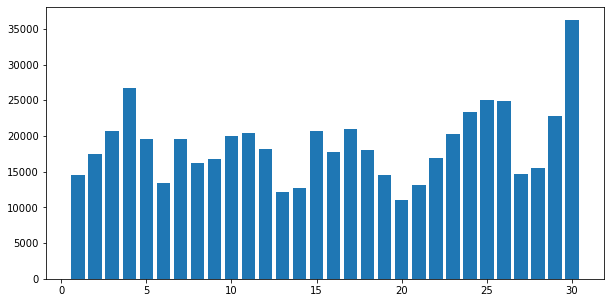

In [88]:
plt.bar(range(1,31),by_date)

In [89]:
by_date_sorted=by_date.sort_values()
by_date_sorted

DOM
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

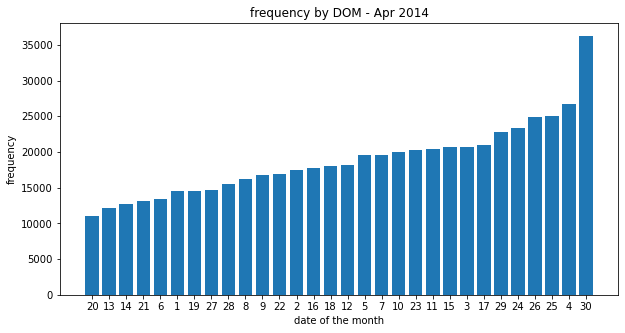

In [93]:
plt.bar(range(1,31),by_date_sorted)
plt.xticks(range(1,31),by_date_sorted.index)
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('frequency by DOM - Apr 2014')
;

### Analyze the hour

''

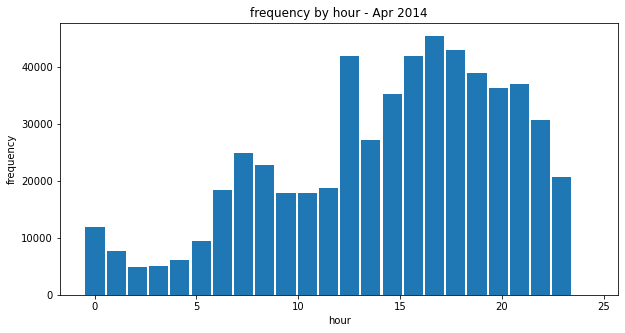

In [103]:
plt.hist(df['hour'],bins=24,rwidth=0.9,range=(-0.5,24.5))
plt.xlabel('hour')
plt.ylabel('frequency')
plt.title('frequency by hour - Apr 2014')
;

In [108]:
def count_rows(rows):
    return len(rows)

by_hour=df.groupby(['hour']).apply(count_rows)
by_hour_sorted=by_hour.sort_values()


''

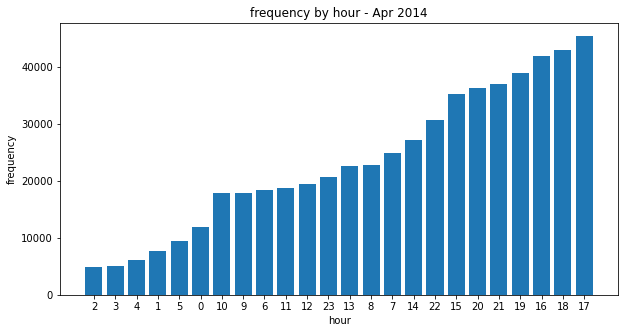

In [112]:
plt.bar(range(1,25),by_hour_sorted)
plt.xticks(range(1,25),by_hour_sorted.index)

plt.xlabel('hour')
plt.ylabel('frequency')
plt.title('frequency by hour - Apr 2014')
;

### Analyze the weekday

In [113]:
df.head()

,Date/Time,Lat,Lon,Base,DOM,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [135]:
df.groupby('hour weekday'.split()).apply(count_rows)

hour  weekday
0     0           518
      1           765
      2           899
      3           792
      4          1367
                 ... 
23    2          2571
      3          2909
      4          5393
      5          5719
      6          1018
Length: 168, dtype: int64

In [136]:
df.groupby('hour weekday'.split()).apply(count_rows).unstack()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


### Graphical representation of rides: as per hour and weekday 

In [140]:
by_cross=df.groupby('hour weekday'.split()).apply(count_rows).unstack()

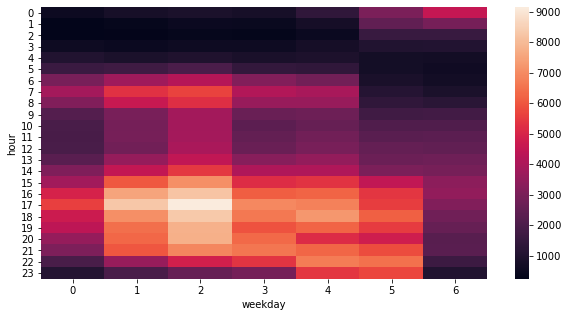

In [141]:
sns.heatmap(by_cross)

### Working with lat and lon

''

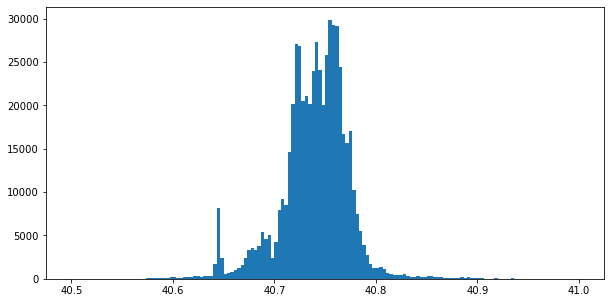

In [147]:
plt.hist(df['Lat'],bins=150,range=(40.5,41))
;

''

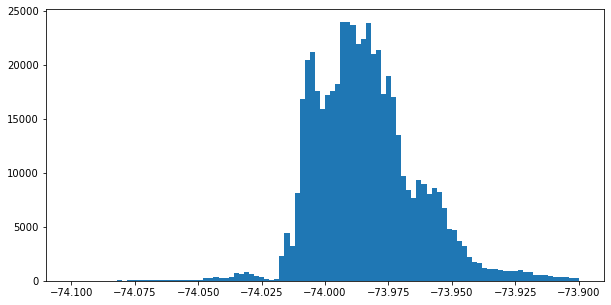

In [153]:
plt.hist(df['Lon'],bins=100,range=(-74.1,-73.9))
;

''

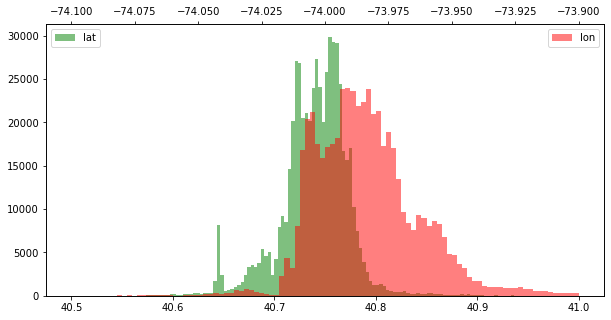

In [164]:
plt.hist(df['Lat'],bins=150,range=(40.5,41),color='g',alpha=0.5,label='lat')
plt.legend(loc='upper left')
plt.twiny()
plt.hist(df['Lon'],bins=100,range=(-74.1,-73.9),color='r',alpha=0.5,label='lon')
plt.legend()
;

(1.0, 100.0)

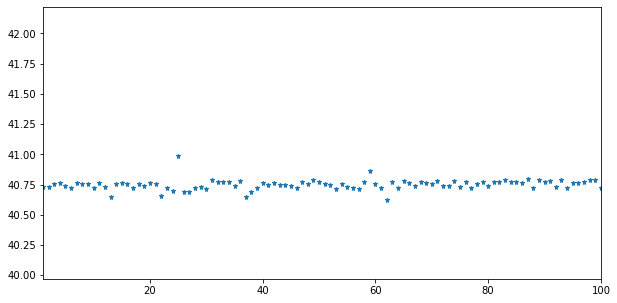

In [172]:
plt.plot(df['Lat'],'*',ms=5)
plt.xlim(1,100)

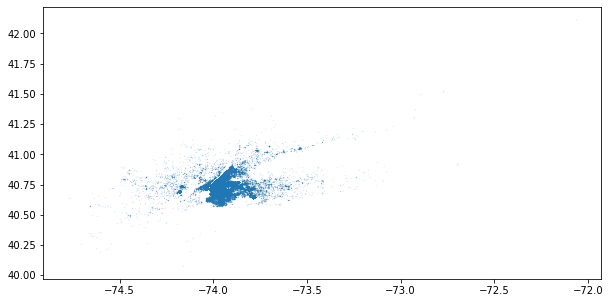

In [181]:
plt.plot(df['Lon'],df['Lat'],'.',ms=0.2,alpha=0.5)

(40.5, 41.5)

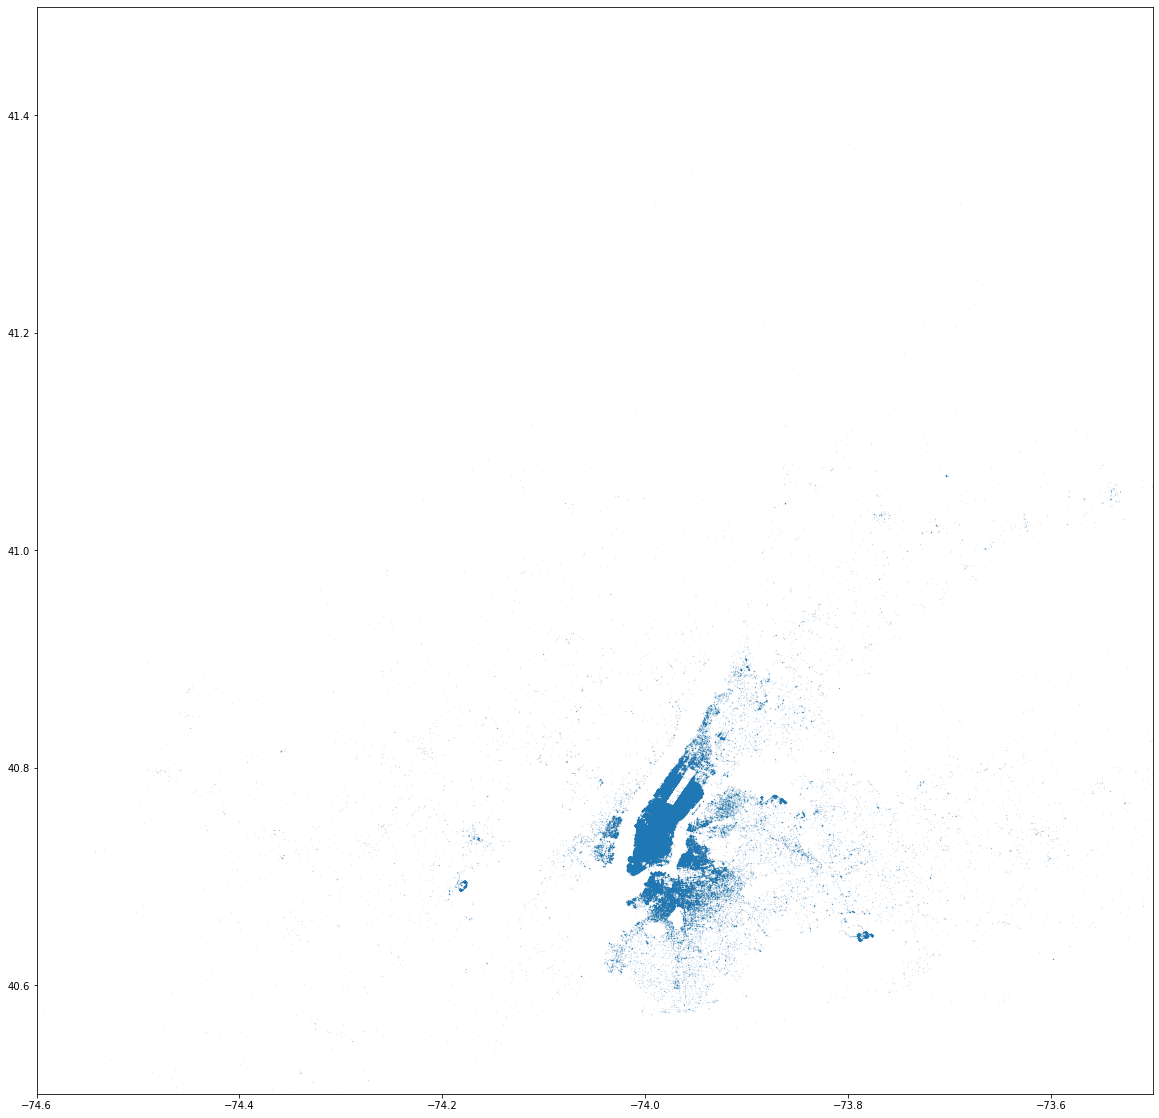

In [190]:
plt.figure(figsize=(20,20))
plt.plot(df['Lon'],df['Lat'],'.',ms=0.2,alpha=0.5)
plt.xlim(-74.6,-73.5)
plt.ylim(40.5,41.5)